# Import Dependencies and Data

In [3]:
# Import dependencies
import pandas as pd
from pathlib import Path
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import tensorflow as tf
import sqlalchemy.ext
from sqlalchemy.ext.automap import automap_base
from sqlalchemy import create_engine, func
from sqlalchemy.orm import Session

In [4]:
# Create a SQLite database engine
engine = create_engine('sqlite:///cleanedwine_df.sqlite')
# reflect an existing database into a new model
Base=automap_base()
# reflect the tables
Base.prepare(autoload_with=engine)

In [5]:
# Query the database
query = "SELECT * FROM cleaned_wine"
# Execute the query and load the results into a DataFrame
df = pd.read_sql(query, engine)
# Display the DataFrame
print(df)

      TARGET  FixedAcidity  VolatileAcidity  CitricAcid  ResidualSugar  \
0          5           7.1            2.640       -0.88          14.80   
1          3           5.7            0.385        0.04          18.80   
2          6           5.5           -0.220        0.39           1.80   
3          0         -17.2            0.520        0.15         -33.80   
4          3           6.0            0.330       -1.06           3.00   
...      ...           ...              ...         ...            ...   
6431       3          -4.1            0.550        0.31          13.55   
6432       3           7.5            0.180        0.34           1.30   
6433       0           8.2            0.390        0.17           2.30   
6434       4           8.4            0.300        0.38          37.10   
6435       4           4.4            0.220        0.29           1.90   

      Chlorides  FreeSulfurDioxide  TotalSulfurDioxide  Density    pH  \
0         0.037              214.0    

In [6]:
#  Rename TARGET column to BoxesSold
df.rename(columns={'TARGET': 'BoxesSold'}, inplace= True)
df.head()

,BoxesSold,FixedAcidity,VolatileAcidity,CitricAcid,ResidualSugar,Chlorides,FreeSulfurDioxide,TotalSulfurDioxide,Density,pH,Sulphates,Alcohol,LabelAppeal,AcidIndex,STARS
0,5,7.1,2.640,-0.88,14.8,0.037,214.0,142.0,0.99518,3.12,0.48,22.0,-1,8,3.0
1,3,5.7,0.385,0.04,18.8,-0.425,22.0,115.0,0.99640,2.24,1.83,6.2,-1,6,1.0
2,6,5.5,-0.220,0.39,1.8,-0.277,62.0,180.0,0.94724,3.09,0.75,12.6,0,8,4.0
3,0,-17.2,0.520,0.15,-33.8,-0.022,551.0,65.0,0.99340,4.31,0.56,13.1,1,5,1.0
4,3,6.0,0.330,-1.06,3.0,0.518,5.0,378.0,0.96643,3.55,-0.86,3.9,1,7,2.0


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6436 entries, 0 to 6435
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   BoxesSold           6436 non-null   int64  
 1   FixedAcidity        6436 non-null   float64
 2   VolatileAcidity     6436 non-null   float64
 3   CitricAcid          6436 non-null   float64
 4   ResidualSugar       6436 non-null   float64
 5   Chlorides           6436 non-null   float64
 6   FreeSulfurDioxide   6436 non-null   float64
 7   TotalSulfurDioxide  6436 non-null   float64
 8   Density             6436 non-null   float64
 9   pH                  6436 non-null   float64
 10  Sulphates           6436 non-null   float64
 11  Alcohol             6436 non-null   float64
 12  LabelAppeal         6436 non-null   int64  
 13  AcidIndex           6436 non-null   int64  
 14  STARS               6436 non-null   float64
dtypes: float64(12), int64(3)
memory usage: 754.3 KB


In [8]:
#  Visualize correlation values
df.corr()

,BoxesSold,FixedAcidity,VolatileAcidity,CitricAcid,ResidualSugar,Chlorides,FreeSulfurDioxide,TotalSulfurDioxide,Density,pH,Sulphates,Alcohol,LabelAppeal,AcidIndex,STARS
BoxesSold,1.000000,-0.012538,-0.075998,0.002345,0.003520,-0.030430,0.022640,0.021602,-0.047599,0.000220,-0.021220,0.073777,0.497946,-0.167643,0.554686
FixedAcidity,-0.012538,1.000000,0.019011,0.014000,-0.015429,-0.006104,0.015438,-0.023323,0.011574,-0.004554,0.042229,-0.013085,0.011376,0.154168,-0.004937
VolatileAcidity,-0.075998,0.019011,1.000000,-0.023432,0.001528,0.014849,-0.011441,-0.000743,0.013098,0.007203,0.001516,0.000260,-0.020242,0.025053,-0.040243
CitricAcid,0.002345,0.014000,-0.023432,1.000000,-0.009843,-0.033561,0.012113,-0.009917,-0.016992,-0.000758,-0.014424,0.016986,0.015332,0.054584,0.007140
ResidualSugar,0.003520,-0.015429,0.001528,-0.009843,1.000000,0.004122,0.021959,0.017031,-0.007121,0.017564,-0.002706,-0.018943,-0.004579,-0.020302,0.019666
Chlorides,-0.030430,-0.006104,0.014849,-0.033561,0.004122,1.000000,-0.020492,0.000419,0.020672,-0.017970,0.002619,-0.022885,-0.006387,-0.001713,-0.006324
FreeSulfurDioxide,0.022640,0.015438,-0.011441,0.012113,0.021959,-0.020492,1.000000,0.013462,-0.008664,-0.002009,0.026829,-0.023867,0.014960,-0.014734,-0.015390
TotalSulfurDioxide,0.021602,-0.023323,-0.000743,-0.009917,0.017031,0.000419,0.013462,1.000000,0.023168,-0.003423,0.002504,-0.016852,-0.002724,-0.022129,0.022095
Density,-0.047599,0.011574,0.013098,-0.016992,-0.007121,0.020672,-0.008664,0.023168,1.000000,-0.002019,-0.010609,-0.006128,-0.018094,0.047779,-0.028492
pH,0.000220,-0.004554,0.007203,-0.000758,0.017564,-0.017970,-0.002009,-0.003423,-0.002019,1.000000,0.010449,-0.012203,0.000218,-0.053713,-0.004400


In [9]:
#  Average of features grouped by Label Appeal
mean_df = df.groupby('LabelAppeal').mean()
mean_df.head()

,BoxesSold,FixedAcidity,VolatileAcidity,CitricAcid,ResidualSugar,Chlorides,FreeSulfurDioxide,TotalSulfurDioxide,Density,pH,Sulphates,Alcohol,AcidIndex,STARS
LabelAppeal,,,,,,,,,,,,,,
-2,1.920792,7.036139,0.405891,0.293713,6.828218,0.067520,19.252475,122.185644,0.993760,3.203713,0.512228,11.001980,7.643564,1.405941
-1,2.712796,6.656015,0.315226,0.288873,6.167803,0.051305,31.367524,127.940542,0.994703,3.187309,0.511426,10.557742,7.650209,1.691933
0,3.642638,6.954322,0.298044,0.323259,4.950888,0.043983,31.669115,124.169457,0.993825,3.203946,0.492750,10.506381,7.642638,2.021182
1,4.526119,6.841760,0.282006,0.330864,5.890983,0.050745,37.080224,123.073072,0.992203,3.179789,0.520647,10.548843,7.636194,2.356343
2,5.310345,7.266284,0.310709,0.320192,5.529885,0.042015,28.819923,130.114943,0.995968,3.229119,0.517816,10.904572,7.819923,2.681992


# DATA VISUALIZATION TOOLS

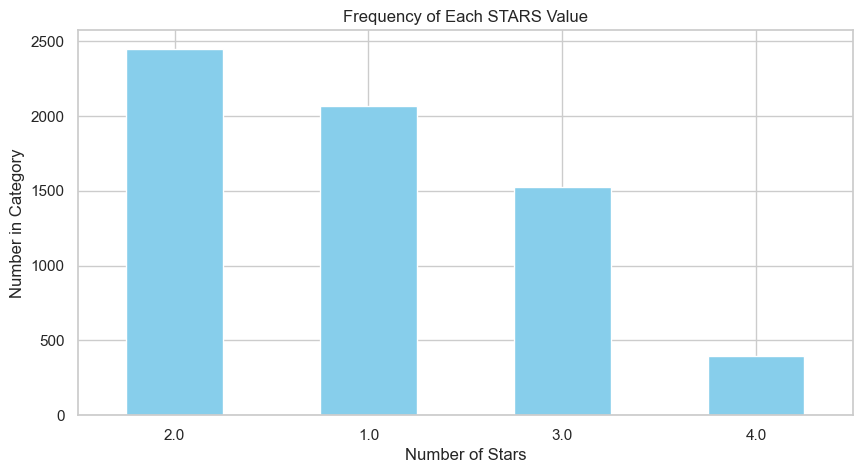

In [45]:
# Value counts for each STARS rating (1-4)
# NOT USING
target_counts = df['STARS'].value_counts()
# Create a bar plot
plt.figure(figsize=(10, 5))
target_counts.plot(kind='bar', color='skyblue')
plt.title('Frequency of Each STARS Value')
plt.xlabel('Number of Stars')
plt.ylabel('Number in Category')
plt.xticks(rotation=0)
plt.grid(True)
plt.show()

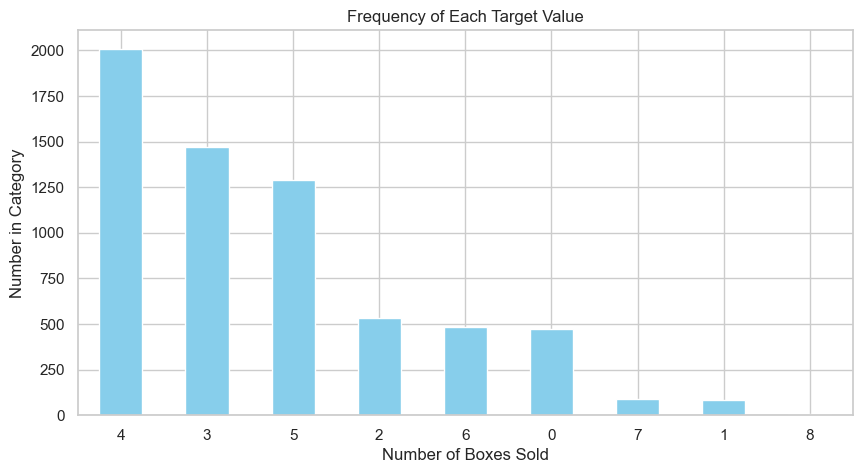

In [46]:
# Number of times n boxes were sold
# NOT USING
target_counts = df['BoxesSold'].value_counts()
# Create a bar plot
plt.figure(figsize=(10, 5))
target_counts.plot(kind='bar', color='skyblue')
plt.title('Frequency of Each Target Value')
plt.xlabel('Number of Boxes Sold')
plt.ylabel('Number in Category')
plt.xticks(rotation=0)
plt.grid(True)
plt.show()

Text(0, 0.5, 'Alcohol Percentage')

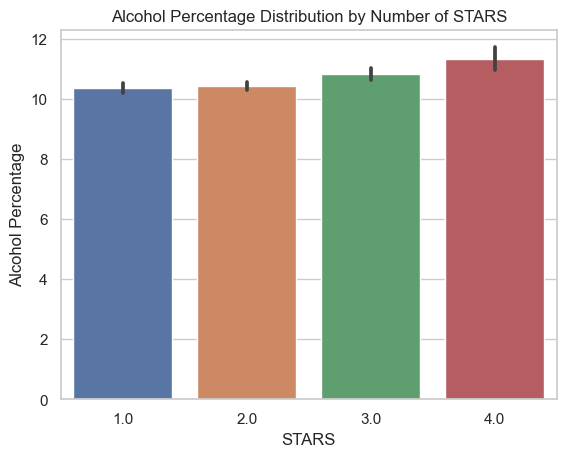

In [47]:
#  Alcohol percentage average per category in STARS
# USED IN PRESENTATION
sns.barplot(x='STARS', y='Alcohol', data=df, estimator=np.mean)
plt.title('Alcohol Percentage Distribution by Number of STARS')
plt.ylabel('Alcohol Percentage')

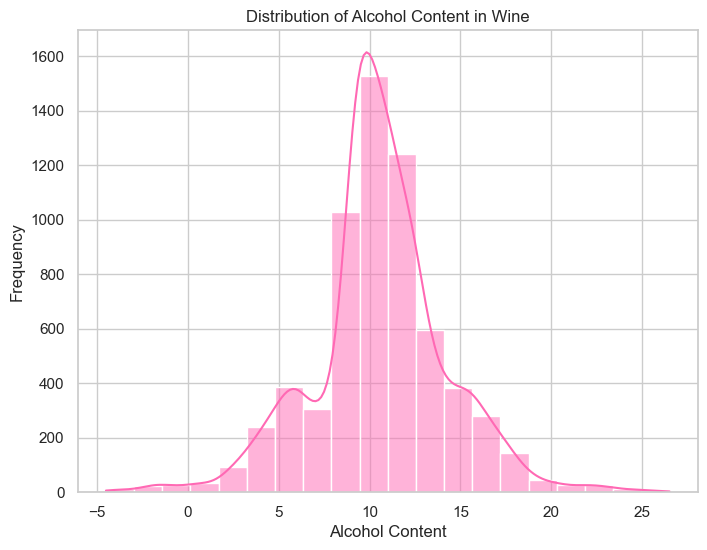

In [48]:
# Alcohol content/Frequency
# NOT USING
sns.set_theme(style="whitegrid")
plt.figure(figsize=(8, 6))
sns.histplot(df['Alcohol'], bins=20, kde=True, color='hotpink')
plt.xlabel('Alcohol Content')
plt.ylabel('Frequency')
plt.title('Distribution of Alcohol Content in Wine')
plt.show()

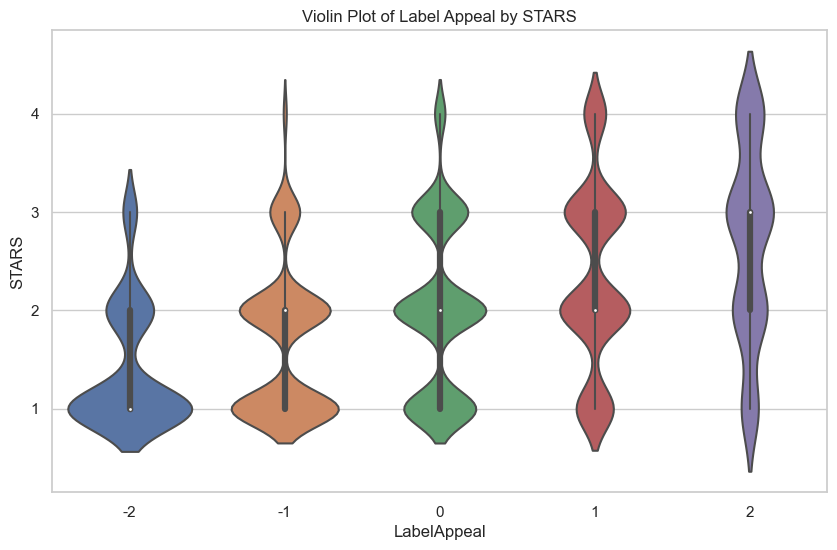

In [49]:
#  Violin plot to show distribution of Label Appeal to STARS
# USED IN PRESENTATION
plt.figure(figsize=(10, 6))
sns.violinplot(x='LabelAppeal', y='STARS', data=df)
plt.title('Violin Plot of Label Appeal by STARS')
plt.xlabel('LabelAppeal')
plt.ylabel('STARS')
plt.show()

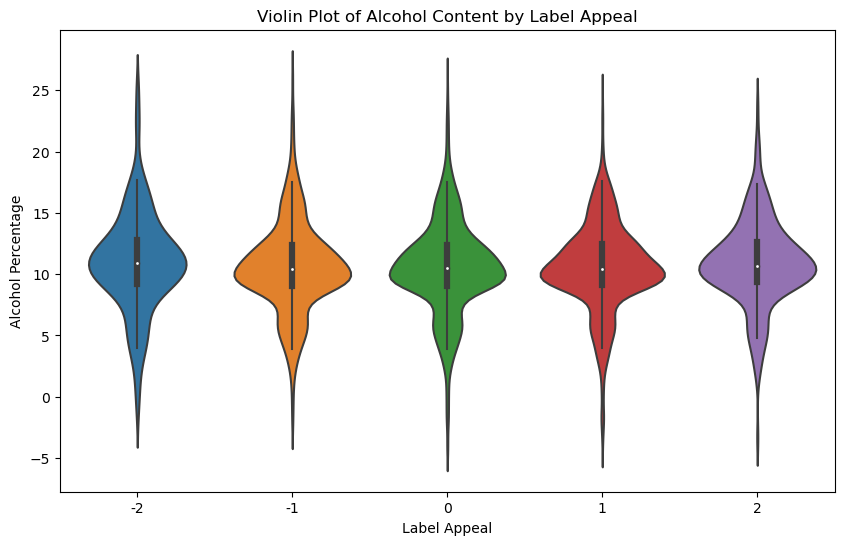

In [10]:
#  Violin plot to show distribution of Label Appeal to Alcohol Percentage
# NOT USED
plt.figure(figsize=(10, 6))
sns.violinplot(x='LabelAppeal', y='Alcohol', data=df)
plt.title('Violin Plot of Alcohol Content by Label Appeal')
plt.xlabel('Label Appeal')
plt.ylabel('Alcohol Percentage')
plt.show()

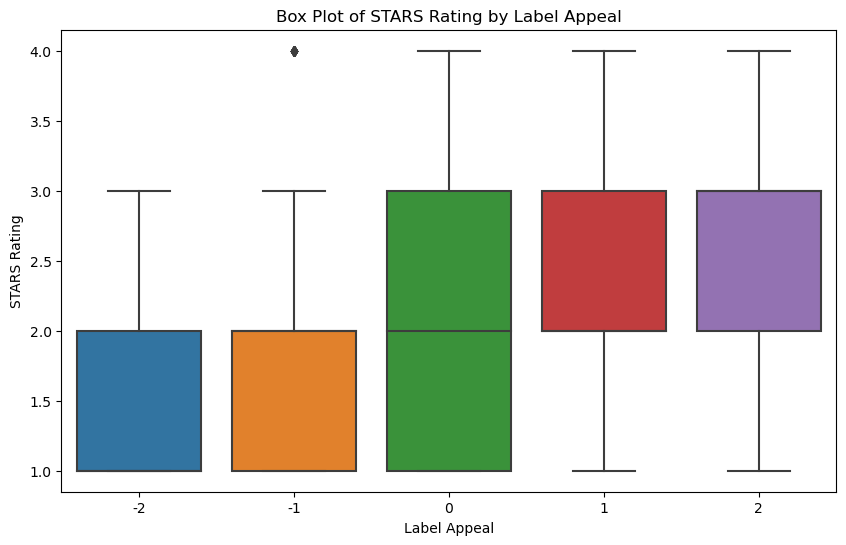

In [14]:
#  Violin plot to show distribution of Label Appeal to Alcohol Percentage
plt.figure(figsize=(10, 6))
sns.boxplot(x='LabelAppeal', y='STARS', data=df)
plt.title('Box Plot of STARS Rating by Label Appeal')
plt.xlabel('Label Appeal')
plt.ylabel('STARS Rating')
plt.show()

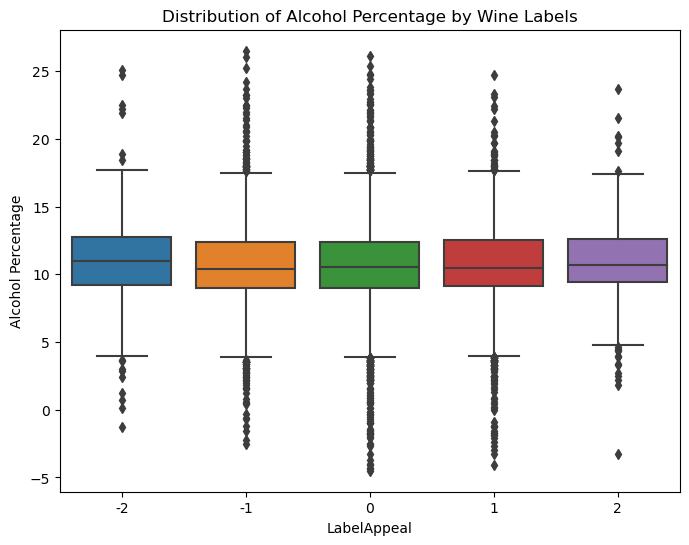

In [15]:
#  Box plot to show distribution of Label Appeal to STARS (SAME AS VIOLIN PLOT)
# NOT USED
plt.figure(figsize=(8, 6))
sns.boxplot(x='LabelAppeal', y='Alcohol', data=df)
plt.xlabel('LabelAppeal')
plt.ylabel('Alcohol Percentage')
plt.title('Distribution of Alcohol Percentage by Wine Labels')
plt.show()

Text(0.5, 1.0, 'Correlation Heatmap')

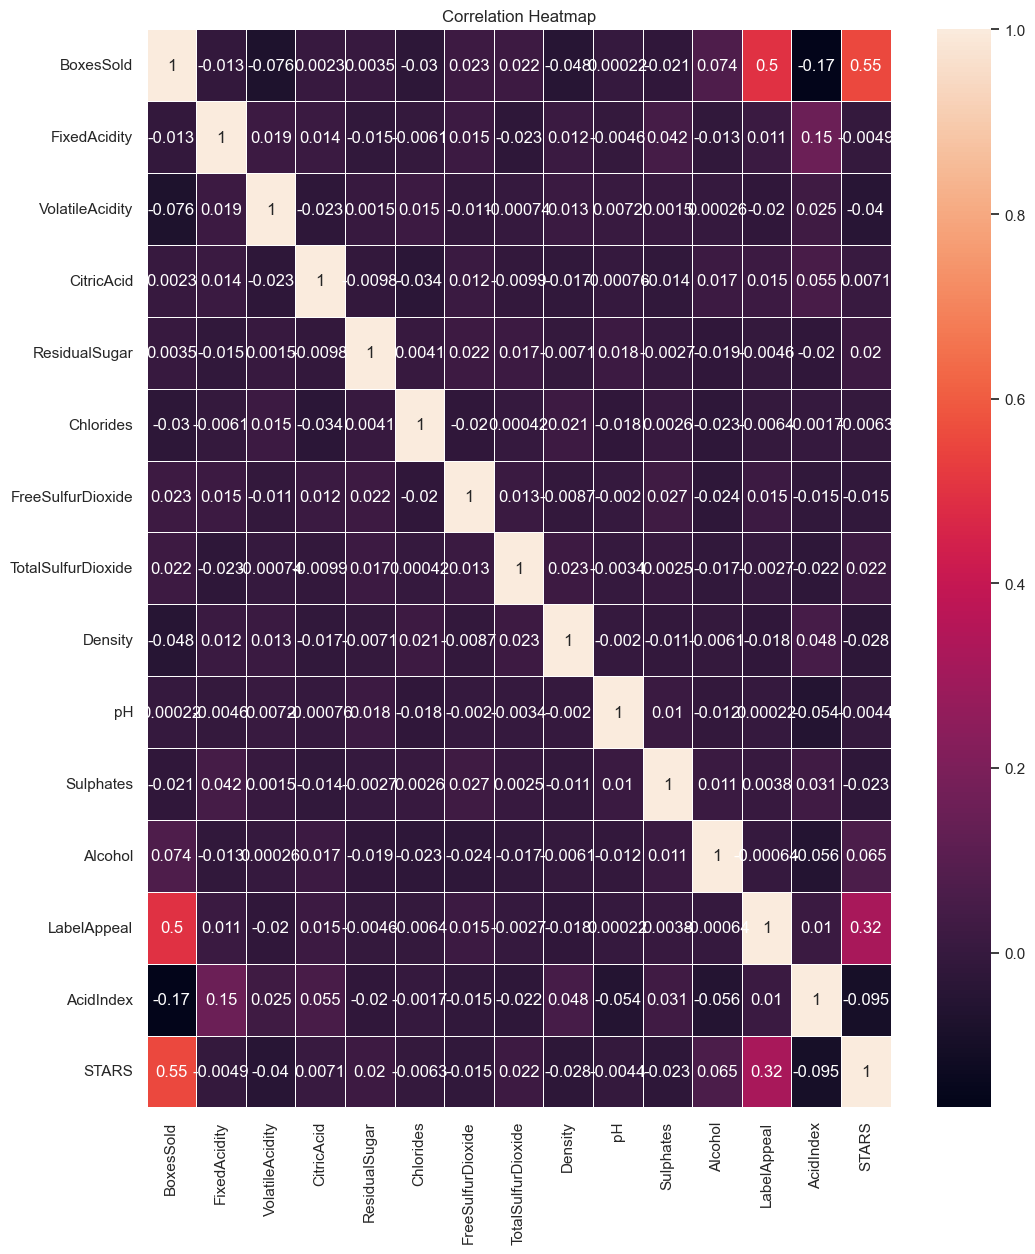

In [52]:
#  Correlation Heatmap
# USED IN PRESENTATION
corr = df.corr()
plt.figure(figsize=(12,14))
sns.heatmap(corr,annot=True, linewidths=0.5)
plt.title('Correlation Heatmap')

# Machine Learning Model - Random Forest

In [10]:
# Import dependencies for Preprocessing Data
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [11]:
# Cast STARS values to integers -1. 
# Results in STARS values 0-3
df['STARS'] = df['STARS'].astype('int')-1
df.head()

,BoxesSold,FixedAcidity,VolatileAcidity,CitricAcid,ResidualSugar,Chlorides,FreeSulfurDioxide,TotalSulfurDioxide,Density,pH,Sulphates,Alcohol,LabelAppeal,AcidIndex,STARS
0,5,7.1,2.640,-0.88,14.8,0.037,214.0,142.0,0.99518,3.12,0.48,22.0,-1,8,2
1,3,5.7,0.385,0.04,18.8,-0.425,22.0,115.0,0.99640,2.24,1.83,6.2,-1,6,0
2,6,5.5,-0.220,0.39,1.8,-0.277,62.0,180.0,0.94724,3.09,0.75,12.6,0,8,3
3,0,-17.2,0.520,0.15,-33.8,-0.022,551.0,65.0,0.99340,4.31,0.56,13.1,1,5,0
4,3,6.0,0.330,-1.06,3.0,0.518,5.0,378.0,0.96643,3.55,-0.86,3.9,1,7,1


In [12]:
# Number of STARS in each category (0-3)
df['STARS'].value_counts()

STARS
1    2450
0    2065
2    1527
3     394
Name: count, dtype: int64

In [13]:
#  Manual class balancing
df0 = df[df['STARS'] == 0].sample(1500, random_state=1, replace=True)
df1 = df[df['STARS'] == 1].sample(1500, random_state=1, replace=True)
df2 = df[df['STARS'] == 2].sample(1500, random_state=1, replace=True)
df3 = df[df['STARS'] == 3].sample(1500, random_state=1, replace=True)

# Combine four DFs to one resulting in 6000 rows of data
df_all = pd.concat([df0,df1,df2,df3], axis=0)

df_all

,BoxesSold,FixedAcidity,VolatileAcidity,CitricAcid,ResidualSugar,Chlorides,FreeSulfurDioxide,TotalSulfurDioxide,Density,pH,Sulphates,Alcohol,LabelAppeal,AcidIndex,STARS
3249,4,6.9,0.24,0.34,4.7,0.040,43.0,161.0,0.95853,3.36,0.38,10.60,0,7,0
735,3,0.9,0.15,0.25,4.8,0.029,72.0,-7.0,0.95323,3.17,1.74,12.20,-2,7,0
3382,5,8.7,0.33,-1.05,1.2,0.016,39.0,150.0,0.96847,3.33,0.62,14.00,-1,6,0
2820,4,-0.1,0.27,0.37,-50.3,0.503,27.0,327.0,0.99174,3.13,1.16,12.70,1,8,0
2968,4,12.6,0.44,0.49,2.4,0.386,26.0,121.0,1.01441,3.23,1.95,18.40,1,10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
421,5,6.4,1.18,0.31,44.8,0.071,41.0,114.0,0.96760,3.37,0.80,6.50,0,7,3
5482,5,2.0,0.63,0.33,6.7,0.037,32.0,155.0,1.01364,4.47,-0.48,15.50,0,8,3
448,4,8.1,1.30,0.22,6.4,0.056,44.0,272.0,0.96467,3.13,1.01,10.10,0,8,3
2120,6,10.7,-0.88,0.41,-30.4,0.093,30.0,134.0,0.96433,2.92,0.42,10.40,1,7,3


In [14]:
# X variable is all features except target (STARS)
# Additionally dropped columns with low dependencies
X = df_all.drop(columns=['STARS', 'AcidIndex', 'CitricAcid', 'FixedAcidity', 'Sulphates', 'Chlorides'])

# Y variable is target 
y = df_all[['STARS']]

In [15]:
# Split into testing and training sets using train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y)

In [16]:
# Check to be sure we have appropriate number to train with
y_train['STARS'].value_counts()

STARS
2    1125
1    1125
3    1125
0    1125
Name: count, dtype: int64

In [17]:
# Create a StandardScaler instances
scaler = StandardScaler()

# Fit the StandardScaler
X_scaler = scaler.fit(X_train)

# Scale the data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

In [65]:
# Import RandomForestClassifier
from sklearn.ensemble import RandomForestClassifier

# Define the Random Forest model
rf_model = RandomForestClassifier(n_estimators=3000, max_depth=12, random_state=42)

# Fit the model
rf_model.fit(X_train_scaled, y_train)

c:\Users\Lori Bissell\anaconda3\Lib\site-packages\sklearn\base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


RandomForestClassifier(max_depth=12, n_estimators=3000, random_state=42)

In [66]:
#  Training model
train_preds = rf_model.predict(X_train_scaled)

from sklearn.metrics import confusion_matrix, classification_report
# Calculating the confusion matrix
cm = confusion_matrix(y_train, train_preds)
cm_df = pd.DataFrame(
    cm, index=["Actual 0", "Actual 1", "Actual 2", "Actual 3"], columns=["Predicted 0", "Predicted 1", "Predicted 2", "Predicted 3"]
)

cr = classification_report(y_train, train_preds)
# print(cm)
print(cr)

              precision    recall  f1-score   support

           0       0.99      0.97      0.98      1125
           1       0.98      0.97      0.97      1125
           2       0.97      0.98      0.98      1125
           3       0.97      0.99      0.98      1125

    accuracy                           0.98      4500
   macro avg       0.98      0.98      0.98      4500
weighted avg       0.98      0.98      0.98      4500



<Axes: title={'center': 'Features Importances'}, ylabel='1'>

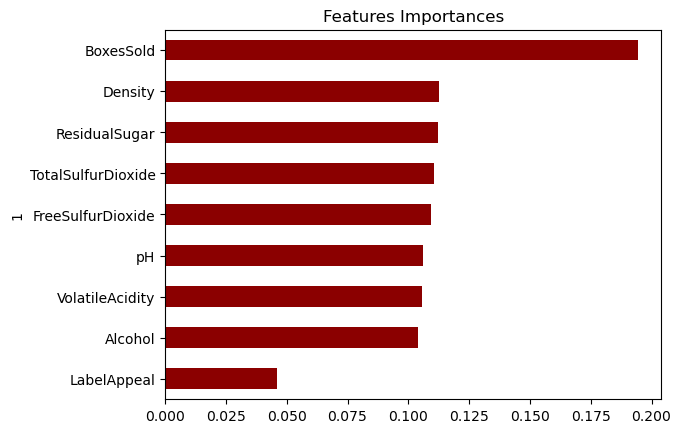

In [36]:
# Visualize Feature Importances
importances_df = pd.DataFrame(sorted(zip(rf_model.feature_importances_, X.columns), reverse=True))
importances_df.set_index(importances_df[1], inplace=True)
importances_df.drop(columns=1, inplace=True)
importances_df.rename(columns={0: 'Feature Importances'}, inplace=True)
importances_sorted = importances_df.sort_values(by='Feature Importances')
importances_sorted.plot(kind='barh', color='darkred', title= 'Features Importances', legend=False)

In [68]:
# Making predictions using the testing data
predictions = rf_model.predict(X_test_scaled)
predictions

array([1, 1, 1, ..., 0, 2, 2])

In [69]:
#  Test model
from sklearn.metrics import confusion_matrix, classification_report
# Calculating the confusion matrix
cm = confusion_matrix(y_test, predictions)
cm_df = pd.DataFrame(
    cm, index=["Actual 0", "Actual 1", "Actual 2", "Actual 3"], columns=["Predicted 0", "Predicted 1", "Predicted 2", "Predicted 3"]
)

cr = classification_report(y_test, predictions)
print(cm)
print(cr)

[[267  63  35  10]
 [ 51 236  67  21]
 [ 16  57 254  48]
 [  0   0  10 365]]
              precision    recall  f1-score   support

           0       0.80      0.71      0.75       375
           1       0.66      0.63      0.65       375
           2       0.69      0.68      0.69       375
           3       0.82      0.97      0.89       375

    accuracy                           0.75      1500
   macro avg       0.74      0.75      0.74      1500
weighted avg       0.74      0.75      0.74      1500



In [30]:
# Import RandomForestClassifier
from sklearn.ensemble import RandomForestClassifier

# Define the Random Forest model
rf_model = RandomForestClassifier(n_estimators=5000, max_depth=15, random_state=42)

# Fit the model
rf_model.fit(X_train_scaled, y_train)

c:\Users\sym0002\AppData\Local\anaconda3\Lib\site-packages\sklearn\base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


RandomForestClassifier(max_depth=15, n_estimators=5000, random_state=42)

In [31]:
#  Training model
train_preds = rf_model.predict(X_train_scaled)

from sklearn.metrics import confusion_matrix, classification_report
# Calculating the confusion matrix
cm = confusion_matrix(y_train, train_preds)
cm_df = pd.DataFrame(
    cm, index=["Actual 0", "Actual 1", "Actual 2", "Actual 3"], columns=["Predicted 0", "Predicted 1", "Predicted 2", "Predicted 3"]
)

cr = classification_report(y_train, train_preds)
# print(cm)
print(cr)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1125
           1       1.00      1.00      1.00      1125
           2       1.00      1.00      1.00      1125
           3       1.00      1.00      1.00      1125

    accuracy                           1.00      4500
   macro avg       1.00      1.00      1.00      4500
weighted avg       1.00      1.00      1.00      4500



In [32]:
predictions = rf_model.predict(X_test_scaled)
predictions

array([3, 2, 2, ..., 3, 2, 3])

In [33]:
#  Test model
from sklearn.metrics import confusion_matrix, classification_report
# Calculating the confusion matrix
cm = confusion_matrix(y_test, predictions)
cm_df = pd.DataFrame(
    cm, index=["Actual 0", "Actual 1", "Actual 2", "Actual 3"], columns=["Predicted 0", "Predicted 1", "Predicted 2", "Predicted 3"]
)

cr = classification_report(y_test, predictions)
print(cm)
print(cr)

[[289  55  27   4]
 [ 51 239  64  21]
 [ 25  61 247  42]
 [  0   2  11 362]]
              precision    recall  f1-score   support

           0       0.79      0.77      0.78       375
           1       0.67      0.64      0.65       375
           2       0.71      0.66      0.68       375
           3       0.84      0.97      0.90       375

    accuracy                           0.76      1500
   macro avg       0.75      0.76      0.75      1500
weighted avg       0.75      0.76      0.75      1500



# Machine Learning Model - Neural Net

In [74]:
from imblearn.combine import SMOTEENN
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split

# Instantiate SMOTE with desired parameters
smote = SMOTEENN(sampling_strategy='auto', random_state=42)
# Fit SMOTE to the training data and oversample the minority class
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)
# Now X_train_resampled and y_train_resampled contain the oversampled data

y_train_resampled['STARS'].value_counts()

STARS
3    642
2    181
0    171
1    117
Name: count, dtype: int64

In [77]:
# One hot encoding
from tensorflow.keras.utils import to_categorical
y_train_hot= to_categorical(y_train, 4)
y_test_hot = to_categorical(y_test, 4)
y_test_hot

array([[0., 0., 1., 0.],
       [1., 0., 0., 0.],
       [0., 1., 0., 0.],
       ...,
       [1., 0., 0., 0.],
       [0., 0., 1., 0.],
       [0., 0., 0., 1.]])

In [78]:
# NOT USING
# Define the deep learning model 
# Changed input dim to 13 after dropping STARS and TARGET
nn_model = tf.keras.models.Sequential()
nn_model.add(tf.keras.layers.Dense(units=50, activation="relu", input_dim=13))
nn_model.add(tf.keras.layers.Dense(units=50, activation="relu"))
nn_model.add(tf.keras.layers.Dense(units=25, activation="relu"))
nn_model.add(tf.keras.layers.Dense(units=4, activation="softmax"))

# Compile the Sequential model together and customize metrics
nn_model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy", tf.keras.metrics.Precision(), tf.keras.metrics.Recall()])

# Train the model
fit_model = nn_model.fit(X_train_scaled, y_train_hot, epochs=50)



Epoch 1/50


c:\Users\Lori Bissell\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


ValueError: Exception encountered when calling Sequential.call().

[1mInput 0 of layer "dense_4" is incompatible with the layer: expected axis -1 of input shape to have value 13, but received input with shape (None, 9)[0m

Arguments received by Sequential.call():
  • inputs=tf.Tensor(shape=(None, 9), dtype=float32)
  • training=True
  • mask=None

In [23]:
# Evaluate the model using the test data
model_loss, model_accuracy, model_precision, model_recall = nn_model.evaluate(X_test_scaled,y_test_hot,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

51/51 - 1s - 11ms/step - accuracy: 0.3536 - loss: 1.5808 - precision: 0.3581 - recall: 0.2604
Loss: 1.580780029296875, Accuracy: 0.3536357879638672


# Machine Learning Model - KNeighbors

In [79]:
# Import the KNeighborsClassifier module from sklearn
from sklearn.neighbors import KNeighborsClassifier

# Instantiate the KNeighborsClassifier model with n_neighbors = 3 
knn = KNeighborsClassifier(n_neighbors=4)

In [80]:
# Train the model using the training data
knn.fit(X_train_scaled, y_train)

c:\Users\Lori Bissell\anaconda3\Lib\site-packages\sklearn\neighbors\_classification.py:228: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


KNeighborsClassifier(n_neighbors=4)

In [81]:
# Create predictions using the testing data
y_pred = knn.predict(X_test_scaled)

In [82]:
# Print the classification report comparing the testing data to the model predictions
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.59      0.66      0.62       375
           1       0.42      0.36      0.39       375
           2       0.45      0.43      0.44       375
           3       0.73      0.78      0.75       375

    accuracy                           0.56      1500
   macro avg       0.55      0.56      0.55      1500
weighted avg       0.55      0.56      0.55      1500



In [83]:
from imblearn.over_sampling import SMOTE
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split

# Instantiate SMOTE with desired parameters
smote = SMOTE(sampling_strategy={3:1000}, random_state=42, k_neighbors=5, n_jobs=None)
# Fit SMOTE to the training data and oversample the minority class
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)
# Now X_train_resampled and y_train_resampled contain the oversampled data

ValueError: With over-sampling methods, the number of samples in a class should be greater or equal to the original number of samples. Originally, there is 1125 samples and 1000 samples are asked.

In [84]:
X_train_resampled
{0:1000, 1:1000, 2:1000, 3:1000}

{0: 1000, 1: 1000, 2: 1000, 3: 1000}

In [85]:
y_train_resampled.value_counts()

STARS
3        642
2        181
0        171
1        117
Name: count, dtype: int64